Ответ пишите прямо здесь или ссылкы на гитхаб/гугл диск. Не прикрепляйте сюда, пожалуйста, файлы
1) Сравните метрики hit_rate@k, precision@k. Какую матрику использовать предпочтительно и почему. Привидите пример 2-3 задач (опишите, что является клиентом, что товаром), в которой более уместно использовать метрику hit_rate?
2)В метрике NDCG@k мы используем логарифм в знаменателе. Как Вы думаете, почему именно логарифм? Какую функцию можно использовать вместо логарифма? Привидите пример метрик/подходов к предобработке данных/функций ошибок в ML, где также в знаменателе присутствует логарифм.
3)Какие еще матрики (Вы можете вспомнить уже пройденные Вами или посмотреть в интернете) могут использоваться для рекомендательных систем (приведите примеры метрики и чем являются интеракции, чтобы она могла быть использована).
4)boughted = [1, 3, 5, 7, 9, 11]
recommended = [2, 5, 7, 4, 11, 9, 8, 10, 12, 3]
Посчитайте на этих данных pr@8, rec@8, AP@8, NDCG@8, RR@8, ERR@8

1. hit_rate@k - показывает бы ли хотя бы 1 товар среди k рекомендованных
precision@k - показывает долю угаданных товаров среди k рекомендованных
То есть, отличие precision@k от hit_rate@k, что мы видим не только правильно ли предложили, но и насколько правильно были предложены товары
пример 1. Задача привлечь человека как постоянного покупателя(установить приложение/ получить карту накопительную)
Пердлагаем несколько товаров, если человек заинтересован хотя бы в 1, то он устанавливает приложение для покупки/ оформляет накопительную карту магазина и делает покупку. Тогда hit_rate = 1
В противном случае hit_rate = 0
пример 2. сервис доставки еды предлагает доставить еду из нескольких ресторанов. если клиент заинтересован в доставке хотя бы из одного предложенного ресторана - устанавливает приложение и делает заказ
Тогда hit_rate = 1
В противном случае hit_rate = 0


2. Логарифм используется для того, чтобы "сгладить" разницу между соседними элементами , но все таки сохранить разницу между элементами, которые находятся далеко друг от друга. Вместо логарифма можно импользовать например корень квадратный или кубический или любую другую функцию, которая сглаживает рост линейной функции


3. Метрики на основе каскадной модели поведения
На практике же, элементы зачастую просматриваются пользователем поочередно, и то, просмотрит ли пользователь следующий элемент, зависит от его удовлетворенности предыдущими. Рассмотрим пример: в ответ на поисковый запрос алгоритм ранжирования предложил пользователю несколько документов. Если документы на позиции 1 и 2 оказались крайне релевантны, то вероятность того, что пользователь просмотрит документ на позиции 3 мала, т.к. он будет вполне удовлетворен первыми двумя.
Подобные модели поведения пользователя, где изучение предложенных ему элементов происходит последовательно и вероятность просмотра элемента зависит от релевантности предыдущих называются каскадными.

Expected reciprocal rank (ERR) — пример метрики качества ранжирования, основанной на каскадной модели.
PFound — метрика качества ранжирования,  использующая похожую на каскадную модель
Graded Mean Reciprocal Rank и Pfound
Данные метрики оценивают удовлетворенность пользователя результатами поиска на основе следующей модели:
- Пользователь просматривает результаты запроса, начиная с первого документа.
- После каждого просмотра документа пользователь принимает случайное решение:
- либо завершить поиск и остаться
удовлетворенным — вероятность такого исхода
зависит от оценки релевантности документа;
- прервать поиск, оставшись неудовлетворенным
(с фиксированной вероятностью);
- продолжить просмотр списка документов.
- Результирующая оценка ответа системы – вероятность того, что пользователь завершит поиск, оставшись удовлетворенным.
Согласно данной модели, степень влияния оценки релевантности документа на метрику зависит не только от позиции документа, но и от оценки релевантности документов, находящихся выше в списке результатов.

4)boughted = [1, 3, 5, 7, 9, 11]
recommended = [2, 5, 7, 4, 11, 9, 8, 10, 12, 3]
Посчитайте на этих данных pr@8, rec@8, AP@8, NDCG@8, RR@8, ERR@8

In [21]:
import pandas as pd
import numpy as np

In [22]:
boughted = [1, 3, 5, 7, 9, 11]
recommended = [2, 5, 7, 4, 11, 9, 8, 10, 12, 3]

In [29]:
def precision_at_k(recommended_list, bought_list, k=5):
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    recommended_list = recommended_list[:k]
    flags = np.isin(bought_list, recommended_list)
    #print(flags)
    precision = flags.sum()/len(recommended_list)
    
    return precision
precision_at_k(recommended, boughted, k=8)

0.5

In [27]:
def recall_at_k(recommended_list, bought_list, k=5):
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)[:k]
    flags = np.isin(bought_list, recommended_list)
    recall = flags.sum()/len(bought_list)
    return recall
recall_at_k(recommended, boughted, k=8)

0.6666666666666666

In [30]:
def ap_k(recommended_list, bought_list, k=5):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    
    flags = np.isin(recommended_list, bought_list)
    
    if sum(flags) == 0:
        return 0
    
    sum_ = 0
    for i in range(1, k+1): 
        if flags[i] == True:
            p_k = precision_at_k(recommended_list, bought_list, k=i)
            sum_ += p_k
            
    result = sum_ / sum(flags)
    
    return result
ap_k(recommended, boughted, k=8)

0.32

In [ ]:
NDCG@8

In [ ]:
sklearn.metrics.ndcg_score(y_true, y_score, *, k=None, sample_weight=None, ignore_ties=False)
boughted = [1, 3, 5, 7, 9, 11]
recommended = [2, 5, 7, 4, 11, 9, 8, 10, 12, 3]

In [36]:
from sklearn.metrics import ndcg_score

In [ ]:
def dcg_at_k(r, k, method=0):
    """Score is discounted cumulative gain (dcg)
    Relevance is positive real values.  Can use binary
    as the previous methods.
    Example from
    http://www.stanford.edu/class/cs276/handouts/EvaluationNew-handout-6-per.pdf
    >>> r = [3, 2, 3, 0, 0, 1, 2, 2, 3, 0]
    >>> dcg_at_k(r, 1)
    3.0
    >>> dcg_at_k(r, 1, method=1)
    3.0
    >>> dcg_at_k(r, 2)
    5.0
    >>> dcg_at_k(r, 2, method=1)
    4.2618595071429155
    >>> dcg_at_k(r, 10)
    9.6051177391888114
    >>> dcg_at_k(r, 11)
    9.6051177391888114
    Args:
        r: Relevance scores (list or numpy) in rank order
            (first element is the first item)
        k: Number of results to consider
        method: If 0 then weights are [1.0, 1.0, 0.6309, 0.5, 0.4307, ...]
                If 1 then weights are [1.0, 0.6309, 0.5, 0.4307, ...]
    Returns:
        Discounted cumulative gain
    """
    r = np.asfarray(r)[:k]
    if r.size:
        if method == 0:
            return r[0] + np.sum(r[1:] / np.log2(np.arange(2, r.size + 1)))
        elif method == 1:
            return np.sum(r / np.log2(np.arange(2, r.size + 2)))
        else:
            raise ValueError('method must be 0 or 1.')
    return 0.


def ndcg_at_k(r, k, method=0):
    """Score is normalized discounted cumulative gain (ndcg)
    Relevance is positive real values.  Can use binary
    as the previous methods.
    Example from
    http://www.stanford.edu/class/cs276/handouts/EvaluationNew-handout-6-per.pdf
    >>> r = [3, 2, 3, 0, 0, 1, 2, 2, 3, 0]
    >>> ndcg_at_k(r, 1)
    1.0
    >>> r = [2, 1, 2, 0]
    >>> ndcg_at_k(r, 4)
    0.9203032077642922
    >>> ndcg_at_k(r, 4, method=1)
    0.96519546960144276
    >>> ndcg_at_k([0], 1)
    0.0
    >>> ndcg_at_k([1], 2)
    1.0
    Args:
        r: Relevance scores (list or numpy) in rank order
            (first element is the first item)
        k: Number of results to consider
        method: If 0 then weights are [1.0, 1.0, 0.6309, 0.5, 0.4307, ...]
                If 1 then weights are [1.0, 0.6309, 0.5, 0.4307, ...]
    Returns:
        Normalized discounted cumulative gain
    """
    dcg_max = dcg_at_k(sorted(r, reverse=True), k, method)
    if not dcg_max:
        return 0.
    return dcg_at_k(r, k, method) / dcg_max

In [ ]:
def reciprocal_rank(recommended_list, bought_list):
    ranks=0.
    for item_rec in recommended_list:
        for i, item_bought in enumerate(bought_list):
            if item_rec == item_bought:
                ranks += 1 / (i+1)
    return ranks / len(recommended_list)

In [ ]:
ERR

Постановка задачи
- пользователь
- товар
Кейс - определить в каждой ситуации, что является пользователем, а что - товаром
1. На сайте Кинопоиска порекомендовать интересные фильмы
2. На сайте hh.ru подобрать лучшие вакансии для соискателей вакансий
3. На сайте hh.ru найти похожие вакансии на ту, которую сейчас просматривает пользователь("вам так же может понравится")
4. На сайте hh.ru подобрать лучших кандидатов для работодателя

Взаимодействия

Explicit (явный отклик пользователя)
    лайк/дизлайк
    рейтинг
    добавление в любимое
    бан
Implicit(неявный отклик пользователя)
    просмотр
    комментарий
    репост
    подписка
    загрузка
    добавление в корзину
    покупка

В чем отличие от классификации

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.DataFrame([['Иван', 'Хлеб бородинский', 1],
             ['Иван', 'Хлеб белый', 1],
             ['Василий', 'Йогурт Epica', 1]], columns =['user', 'item','purchase'])

user              item  purchase
0     Иван  Хлеб бородинский         1
1     Иван        Хлеб белый         1
2  Василий      Йогурт Epica         1

как выглядят данные 
по столбцам items, по строкам user
на пересечении или 0/1(взаимодействие неявное) или рейтинг(явное взаимодействие)

Постойте, ведь можно добавить фичи на user(средний чек, кол-во покупок в категориях и тд), на item(цена, кол-во продаж в неделю и тд) и решать задачу классификации. В чем отличие RecSys(Recomender System) от классификации?

- много предсказаний для 1 user(extreme classification)
- гораздо больший объем данных: 100к users, 10к items - 1B предсказаний
- большинство товаров user никогда не видел -> не взаимодействовал -> 0 не значит не понравился
- feedback loop
- иногда важен порядок рекомендаций


In [ ]:
pd.DataFrame([['Иван', 'Хлеб бородинский', 1],
             ['Иван', 'Хлеб белый', 0],
             ['Василий', 'Йогурт Epica', "?"]], columns =['user', 'item','purchase'])

Основные типы задач

**Рекомендация топ-К** товаров Дан список товаров. Рекомендовать пользователю К товаров, которые ему понравятся
- e-mail рассылки(мвидео, hoff, пятоерочка)
- push- уведомления (Delivery club, Headhunter, Виктория)
- Рекомендации в отдельном окне на сайте (vk, okko)


**Ранжирование товаров**  Дан список товаров. Нужно отранжировать его в порядке убывания интереса для пользователя
- ранжирование каталога товаров (wb, lamoda)
- ранжирование ленты (vk, я.дзен)
- ранжирование поисковой выдачи(яндекс, гугл)
- ранжирование "каруселей" товаров(Delivery club, я.еда)

**Поиск похожих товаров**  Дан 1 товар. Нужно найти наиболее похожие на него товары
- "вам так же может понравиться" (ozon, циан)
- похожим пользователям понравилось (vk)
- вы можете быть знакомы (vk, facebook)

**Рекомендация дополнительного товара**  Дан 1 товар. Нужно найти товары, которые покупают вместе с этим товаром
- "с этим. товаром часто покупают " (я.маркет, ozon, мвидео)

**2. ML-метрики качества**

Хороши ли рекомендации, предлагаемые моделью?
Обычно считается для каждого юзера, затем устредняются по юзерам
Представим что в магазине всего 10 товаров

На практике разбиение на тест и валид делается следующим образом - смотрим на время - все что было в прошедшем времени - тест, что в будующем - валид

In [3]:
recommended_list = [143, 156, 1134, 991, 27, 1543, 3345, 533, 11, 43] #id товаров
bought_list = [521, 32, 143, 991]

**1. Hit rate**
Hit rate= был ли хотя бы 1 релевантный товар среди рекомендованных
- иногда применяется, когда продаются достаточно дорогие товары, например, бытовая техника
принимает значение или 0 или 1

Hit rate@k= был ли хотя бы 1 релевантный товар среди топ-к рекомендованных

+ точно понимаем получилось или нет
- если угадали несколько товаров то мы не поймем сколько угадали

In [ ]:
def hit_rate(recommended_list, bought_list):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    
    flags = np.isin(bought_list, recommended_list)
    hit_rate = (flags.sum()>0).astype(int)
    
    return hit_rate

def hit_rate_at_k(recommended_list, bought_list, k=5):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)[:k]
    
    flags = np.isin(bought_list, recommended_list)
    hit_rate = (flags.sum()>0).astype(int)
    
    return hit_rate


**2. Precision**
Precision - доля релевантных товаров среди рекомендованных = какой процент рекомендованных товаров юзер купил
- пожалуй самая приближенная к бизнес-метрикам и самая популярная метрика
Precision = ( # of recommended items that are relevant)/(#of recommended items)
Precision@k = ( # of recommended items @k that are relevant)/(#of recommended items @k)
Money precision@k = (revenue of recommended items @k that are relevant)/(revenue of recommended items @k)
Note: Обычно k в precision@k достаточно невелико(5-20) и определеяется  из бизнес-логики. Например, 5 товаров в e-mail рассылке, 20 ответов на первой странице гугл и тд


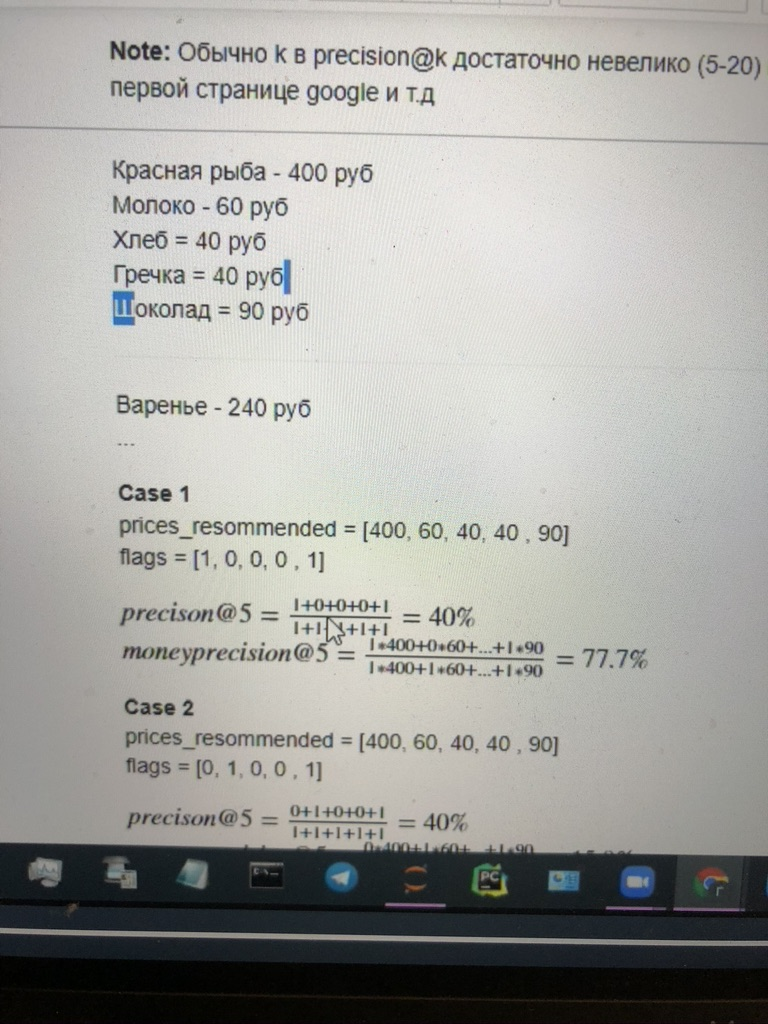

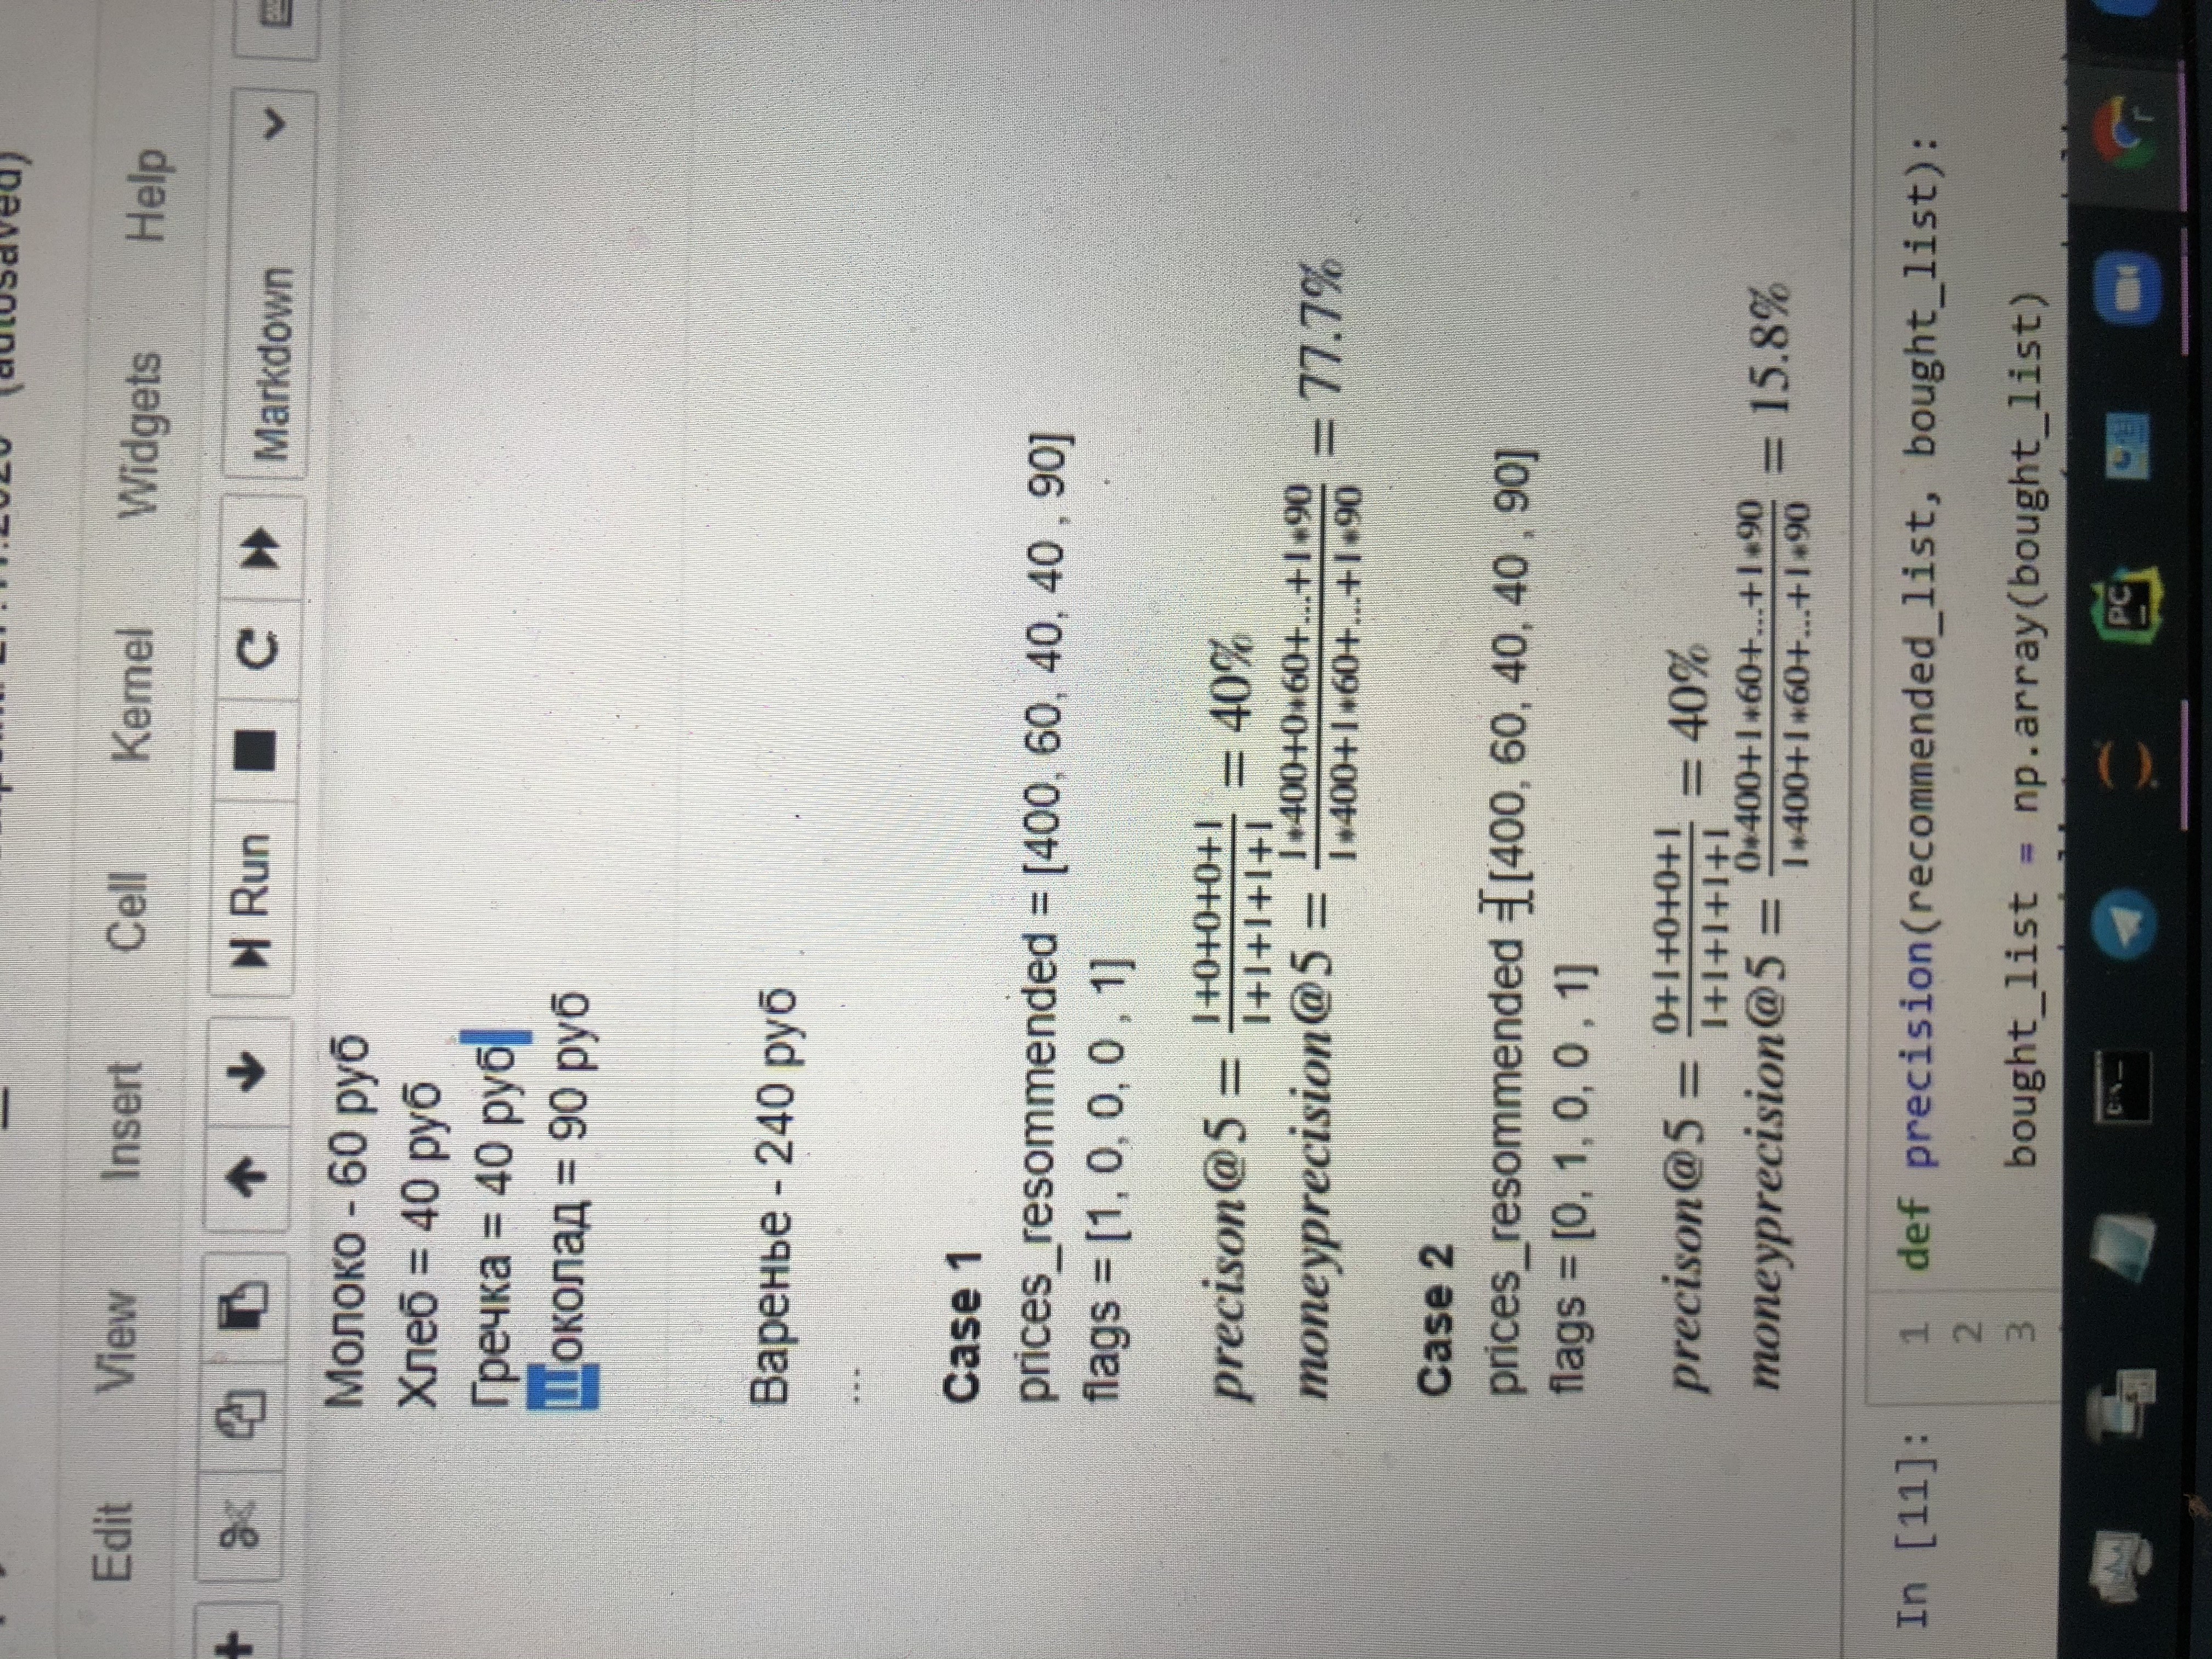

In [4]:
def precision(recommended_list, bought_list):
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    flags = np.isin(bought_list, recommended_list)
    precision = flags.sum()/len(recommended_list)
    return precision
def precision_at_k(recommended_list, bought_list, k=5):
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    recommended_list = recommended_list[:k]
    flags = np.isin(bought_list, recommended_list)
    print(flags)
    precision = flags.sum()/len(recommended_list)
    
    return precision


In [5]:
precision(recommended_list, bought_list)

0.2

In [6]:
precision_at_k(recommended_list, bought_list, k=5)

[False False  True  True]


0.4

In [7]:
precision_at_k(recommended_list, bought_list, k=3)

[False False  True False]


0.3333333333333333

**3. Recall**

Recall - доля рекомендованных товаров среди релевантных = какой процент купленных товаров был среди рекомендованных 
-
обычно используется для моделей пре-фильтрации товаров(убрать те товары , которые точно не будем рекомендовать)
Recall = (# of recommended items that are relevant)/(# of relevant items)
Recall@k = (# of recommended items @k that are relevant)/(# of relevant items)
money Recall@k = (revenue of recommended items @k that are relevant)/(revenue of relevant items)
Note: в Recall@k число k обычно достаточно большое (50-200), больше чем покупок у среднестатистического юзера

Недостатки:


In [8]:
def recall(recommended_list, bought_list):
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    flags = np.isin(bought_list, recommended_list)
    recall = flags.sum()/len(bought_list)
    return recall
def recall_at_k(recommended_list, bought_list, k=5):
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)[:k]
    flags = np.isin(bought_list, recommended_list)
    recall = flags.sum()/len(bought_list)
    return recall

In [9]:
recall(recommended_list, bought_list)

0.5


Недостатки этих метрик: не важна очередность предлагаемых товаров

**Метрики ранжирования**
Если важен порядок рекомендаций

 **AP@k**
 AP@k - avarage precision at k
 AP@k = (1/r)*summ([recommended]*precision@k)
 r-количество релевантных среди рекомендованных
 суммируем по всем релевантным товарам
 зависит от порядка рекомендации

In [10]:
def ap_k(recommended_list, bought_list, k=5):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    
    flags = np.isin(recommended_list, bought_list)
    
    if sum(flags) == 0:
        return 0
    
    sum_ = 0
    for i in range(1, k+1): 
        if flags[i] == True:
            p_k = precision_at_k(recommended_list, bought_list, k=i)
            sum_ += p_k
            
    result = sum_ / sum(flags)
    
    return result

In [11]:
recommended_list

[143, 156, 1134, 991, 27, 1543, 3345, 533, 11, 43]

In [12]:
bought_list = [521, 156, 143, 991]

In [13]:
ap_k(recommended_list, bought_list, k=5)

[False False  True False]
[False  True  True False]


0.5555555555555555

### MAP@k

MAP@k (Mean Average Precision@k)  
Среднее AP@k по всем юзерам
- Показывает средневзвешенную точность рекомендаций

$$MAP@k = \frac{1}{|U|} \sum_u{AP_k}$$
  
|U| - кол-во юзеров

### AUC@k
AUC для первых k наблюдений  
- Можно посчитать как sklern.metrics.roc_auc_score для топ-k предсказаний
- Показывает долю верно отранжированных товаров

### NDCG@k
Normalized discounted cumulative gain

$$DCG = \frac{1}{|r|} \sum_u{\frac{[bought fact]}{discount(i)}}$$  

$discount(i) = 1$ if $i <= 2$,   
$discount(i) = log_2(i)$ if $i > 2$


(!) Считаем для первых k рекоммендаций   
(!) - существуют вариации с другими $discount(i)$  
i - ранк рекомендованного товара  
|r| - кол-во рекомендованных товаров 

$$NDCG = \frac{DCG}{ideal DCG}$$



In [14]:
recommended_list = [143, 156, 1134, 991, 27, 1543, 3345, 533, 11, 43] #id товаров
bought_list = [521, 32, 143, 991]

$DCG@5 = \frac{1}{5}*(1 / 1 + 0 / log(2) + 0 / log(3) + 1 / log(4) + 0 / log(5))$  
$ideal DCG@5 = \frac{1}{5}*(1 / 1 + 1 / log(2) + 1 / log(3) + 1 / log(4) + 1 / log(5))$  

$NDCG = \frac{DCG}{ideal DCG}$

AP более строго штрафует за неправильное предсказание в первых позиций списка рекомендаций. NDCG более плавная

### MRR@k
Mean Reciprocal Rank

- Считаем для первых k рекоммендаций
- Найти ранг первого релевантного предсказания $k_u$
- Посчитать reciprocal rank = $\frac{1}{k_u}$

$$MRR = mean(\frac{1}{k_u})$$

In [18]:
def reciprocal_rank(recommended_list, bought_list):
    ranks=0.
    for item_rec in recommended_list:
        for i, item_bought in enumerate(bought_list):
            if item_rec == item_bought:
                ranks += 1 / (i+1)
    return ranks / len(recommended_list)

In [15]:
recommended_list

[143, 156, 1134, 991, 27, 1543, 3345, 533, 11, 43]

In [16]:
bought_list

[521, 32, 143, 991]

In [19]:
reciprocal_rank(recommended_list, bought_list)

0.05833333333333333

# 3. Связь бизнес-метрик, ML-метрик и функции потерь(loss)

- **loss** - то, что оптимизирует модель (RMSE - Root Mean Squared Error)
- **ML-метрика** - то, как мы измеряем качество на test (money precision@5)
- **Бизнес-метрика** - то, что хочет оптимизировать бизнес (выручка)

В идеале loss = ML-метрика = бизнес-метрика, но это возмонжо в очень редких случаях

Надеемся, что:  
    *Оптимизация loss --> рост ML-метрик --> рост бизнес-метрик*

### Пример: рекомендательная система товаров на сайте  
      
На сайте есть баннер, на котором мы можем разместить 5 товаров. Надо порекомендовать эти 5 товаров персонально каждому юзеру

*Шаг 1: Определим бизнес-метрику*  
Бизнес хочет максимизировать выручку --> бизнес-метрика - **Выручка**  

*Шаг 2: Разложим ее на составляющие*  
Выручка =   
       Средний чек * кол-во покупок =   
       Средний чек * (число юзеров * конверсия из захода на сайт в заказ) =
       Число юзеров * (Средний чек * конверсия из захода на сайт в заказ)
       
Рекомендательная система влияет только на (Средний чек * конверсия из захода на сайт в заказ).   
Хорошим приближением этого является **money precision@5** - ML-метрика

*Шаг 3: loss*  
Это существенно сложнее. Персонализированные ML-модели не умеют напрямую оптимизировать конверсию. Стандартный loss - **RMSE**. Можно для начала попробовать его. 

P.S. Если вы хотите приблизить RMSE к money precision@5, то можно посчитать weighted RMSE, где вес каждого наблюдения = стоимость товара.   
P.S.S. Про другие виды loss будет рассказано в курсе

Литература

- обзор и введение (полные) https://habr.com/ru/company/jetinfosystems/blog/453792/
- постановка, подготовка данных (1) https://habr.com/ru/company/lanit/blog/420499/
- метрики, бейзлайн подходы (2) https://habr.com/ru/company/lanit/blog/421401/
- метрики ранжирования https://habr.com/ru/company/econtenta/blog/303458/
- метрики для бинарной классификации [обзор Дьяконова](https://dyakonov.org/2019/05/31/%d1%84%d1%83%d0%bd%d0%ba%d1%86%d0%b8%d0%be%d0%bd%d0%b0%d0%bb%d1%8b-%d0%ba%d0%b0%d1%87%d0%b5%d1%81%d1%82%d0%b2%d0%b0-%d0%b2-%d0%b7%d0%b0%d0%b4%d0%b0%d1%87%d0%b5-%d0%b1%d0%b8%d0%bd%d0%b0%d1%80%d0%bd/)